# NBA Age Decline Project Part 3 - EDA and Modeling

### Imports

In [1]:
import nba_api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import time
import json

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

Two dataframes from part 2 below

In [2]:
classification_df = pd.read_csv('C:/Users/kevin/Downloads/cleaned player df v2.csv')
classification_df

,FULL_NAME,PLAYER_ID,SEASON_ID,RANK_PG_EFF,EFF_CHANGE,TARGET,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSITION
0,Grant Hill,255,1994-95,22,15,False,DET,22,70,38.3,7.3,15.2,0.477,0.1,0.4,0.148,5.3,7.3,0.732,1.8,4.6,6.4,5.0,1.8,0.9,2.9,2.9,19.9,SF
1,Grant Hill,255,1995-96,7,3,False,DET,23,80,40.8,7.1,15.3,0.462,0.1,0.3,0.192,6.1,8.1,0.751,1.6,8.2,9.8,6.9,1.3,0.6,3.3,3.0,20.2,SF
2,Grant Hill,255,1996-97,4,-4,False,DET,24,80,39.3,7.8,15.7,0.496,0.1,0.4,0.303,5.6,7.9,0.711,1.5,7.5,9.0,7.3,1.8,0.6,3.2,2.3,21.4,SF
3,Grant Hill,255,1997-98,8,-4,False,DET,25,81,40.7,7.6,16.8,0.452,0.0,0.3,0.143,5.9,8.0,0.740,1.1,6.5,7.7,6.8,1.8,0.7,3.5,2.4,21.1,SF
4,Grant Hill,255,1998-99,12,4,False,DET,26,50,37.0,7.7,16.0,0.479,0.0,0.3,0.000,5.7,7.6,0.752,1.3,5.8,7.1,6.0,1.6,0.5,3.7,2.3,21.1,SF
5,Grant Hill,255,2006-07,89,18,False,ORL,34,65,30.9,5.3,10.2,0.518,0.0,0.2,0.167,3.8,5.0,0.765,0.8,2.8,3.6,2.1,0.9,0.4,2.2,2.2,14.4,SF
6,Grant Hill,255,2007-08,71,-11,True,PHX,35,70,31.7,5.1,10.2,0.503,0.5,1.5,0.317,2.4,2.8,0.867,1.1,4.0,5.0,2.9,0.9,0.8,1.4,2.2,13.1,SF
7,Grant Hill,255,2008-09,82,-9,False,PHX,36,82,29.8,4.8,9.1,0.523,0.3,0.9,0.316,2.2,2.7,0.808,0.8,4.2,4.9,2.3,1.1,0.7,1.5,2.2,12.0,SF
8,Grant Hill,255,2009-10,91,-4,False,PHX,37,81,30.0,4.1,8.7,0.478,0.4,1.0,0.438,2.5,3.1,0.817,0.9,4.6,5.5,2.4,0.7,0.4,1.3,2.0,11.3,SF
9,Juwan Howard,436,1994-95,41,23,False,WAS,22,65,36.1,7.0,14.3,0.489,0.0,0.1,0.000,3.0,4.5,0.664,2.8,5.6,8.4,2.5,0.8,0.2,2.6,3.6,17.0,C


In [3]:
regression_df = pd.read_csv('C:/Users/kevin/Downloads/regression inputs.csv')
regression_df

,FULL_NAME,PLAYER_ID,SEASON_ID,RANK_PG_EFF,EFF_CHANGE,TARGET,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSITION,GP_career,GS_career,MIN_career,FGM_career,FGA_career,FG_PCT_career,FG3M_career,FG3A_career,FG3_PCT_career,FTM_career,FTA_career,FT_PCT_career,OREB_career,DREB_career,REB_career,AST_career,STL_career,BLK_career,TOV_career,PF_career,PTS_career
0,Grant Hill,255,2007-08,71,-11,True,PHX,35,70,31.7,5.1,10.2,0.503,0.5,1.5,0.317,2.4,2.8,0.867,1.1,4.0,5.0,2.9,0.9,0.8,1.4,2.2,13.1,SF,1026,972,33.9,6.2,12.8,0.483,0.2,0.7,0.314,4.1,5.4,0.769,1.1,4.9,6.0,4.1,1.2,0.6,2.4,2.3,16.7
1,Juwan Howard,436,2005-06,90,-26,True,HOU,33,80,31.7,4.9,10.7,0.459,0.0,0.1,0.000,1.9,2.4,0.806,2.1,4.6,6.7,1.4,0.6,0.1,1.7,2.9,11.8,C,1208,900,30.3,5.4,11.5,0.469,0.0,0.0,0.120,2.5,3.3,0.764,1.9,4.2,6.1,2.2,0.7,0.3,2.0,2.9,13.4
2,Jason Kidd,467,2009-10,33,-39,True,DAL,37,80,36.0,3.6,8.4,0.423,2.2,5.2,0.425,1.0,1.2,0.808,0.6,5.0,5.6,9.1,1.8,0.4,2.4,1.8,10.3,PG,1391,1350,36.0,4.5,11.2,0.400,1.4,4.1,0.349,2.2,2.8,0.785,1.3,5.0,6.3,8.7,1.9,0.3,2.9,1.8,12.6
3,Kurt Thomas,703,2007-08,109,-47,True,TOT,35,70,22.6,2.8,5.7,0.492,0.0,0.0,0.000,0.8,1.1,0.663,1.9,5.4,7.2,1.0,0.8,0.8,0.7,2.7,6.3,C,1110,650,24.5,3.5,7.1,0.486,0.0,0.0,0.281,1.2,1.5,0.760,1.7,4.9,6.6,1.1,0.7,0.8,1.1,3.2,8.1
4,Kevin Garnett,708,2011-12,20,-16,True,BOS,36,60,31.1,6.5,13.0,0.503,0.1,0.2,0.333,2.7,3.2,0.857,1.1,7.1,8.2,2.9,0.9,1.0,1.8,2.4,15.8,PF,1462,1425,34.5,7.2,14.5,0.497,0.1,0.4,0.275,3.3,4.2,0.789,2.2,7.8,10.0,3.7,1.3,1.4,2.2,2.4,17.8
5,Jerry Stackhouse,711,2000-01,27,-20,True,DET,26,80,40.1,9.7,24.1,0.402,2.1,5.9,0.351,8.3,10.1,0.822,1.2,2.7,3.9,5.1,1.2,0.7,4.1,2.0,29.8,SF,970,564,31.2,5.6,13.6,0.409,1.0,3.3,0.309,4.8,5.8,0.822,1.0,2.2,3.2,3.3,0.9,0.5,2.7,1.9,16.9
6,Rasheed Wallace,739,2008-09,66,-72,True,DET,34,66,32.2,4.6,10.9,0.419,1.7,4.8,0.354,1.2,1.5,0.772,0.8,6.6,7.4,1.4,0.9,1.3,0.9,3.0,12.0,C,1109,956,32.7,5.7,12.2,0.467,1.0,2.9,0.336,2.1,2.9,0.721,1.4,5.3,6.7,1.8,1.0,1.3,1.5,2.9,14.4
7,Marcus Camby,948,2006-07,16,3,True,DEN,33,70,33.8,4.5,9.4,0.473,0.0,0.0,0.000,2.3,3.2,0.729,2.3,9.3,11.7,3.2,1.2,3.3,1.7,2.6,11.2,C,973,786,29.5,3.9,8.3,0.466,0.0,0.1,0.205,1.8,2.6,0.670,2.7,7.1,9.8,1.9,1.0,2.4,1.4,2.8,9.5
8,Ray Allen,951,2006-07,21,-54,True,SEA,31,55,40.3,9.2,21.0,0.438,3.0,8.1,0.372,5.1,5.6,0.903,1.0,3.5,4.5,4.1,1.5,0.2,2.8,2.1,26.4,SG,1300,1149,35.7,6.6,14.6,0.452,2.3,5.7,0.400,3.4,3.8,0.894,0.9,3.1,4.1,3.4,1.1,0.2,2.1,2.2,18.9
9,Steve Nash,959,2006-07,10,-11,True,PHX,33,76,35.3,6.8,12.8,0.532,2.1,4.5,0.455,2.9,3.3,0.899,0.4,3.1,3.5,11.6,0.8,0.1,3.8,1.5,18.6,PG,1217,1053,31.3,5.2,10.6,0.490,1.4,3.2,0.428,2.5,2.8,0.904,0.5,2.5,3.0,8.5,0.7,0.1,2.9,1.6,14.3


In [5]:
regression_df.columns

Index(['FULL_NAME', 'PLAYER_ID', 'SEASON_ID', 'RANK_PG_EFF', 'EFF_CHANGE',
       'TARGET', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSITION',
       'GP_career', 'GS_career', 'MIN_career', 'FGM_career', 'FGA_career',
       'FG_PCT_career', 'FG3M_career', 'FG3A_career', 'FG3_PCT_career',
       'FTM_career', 'FTA_career', 'FT_PCT_career', 'OREB_career',
       'DREB_career', 'REB_career', 'AST_career', 'STL_career', 'BLK_career',
       'TOV_career', 'PF_career', 'PTS_career'],
      dtype='object')

### EDA

Looks like some points have positive change, so just need to clean that

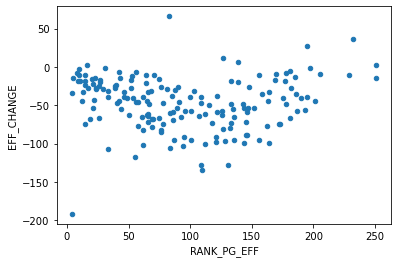

In [6]:
regression_df.plot(kind='scatter', x='RANK_PG_EFF', y='EFF_CHANGE')
# some points are positive

In [7]:
regression_df = regression_df[regression_df['EFF_CHANGE'] < 0]
regression_df

,FULL_NAME,PLAYER_ID,SEASON_ID,RANK_PG_EFF,EFF_CHANGE,TARGET,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSITION,GP_career,GS_career,MIN_career,FGM_career,FGA_career,FG_PCT_career,FG3M_career,FG3A_career,FG3_PCT_career,FTM_career,FTA_career,FT_PCT_career,OREB_career,DREB_career,REB_career,AST_career,STL_career,BLK_career,TOV_career,PF_career,PTS_career
0,Grant Hill,255,2007-08,71,-11,True,PHX,35,70,31.7,5.1,10.2,0.503,0.5,1.5,0.317,2.4,2.8,0.867,1.1,4.0,5.0,2.9,0.9,0.8,1.4,2.2,13.1,SF,1026,972,33.9,6.2,12.8,0.483,0.2,0.7,0.314,4.1,5.4,0.769,1.1,4.9,6.0,4.1,1.2,0.6,2.4,2.3,16.7
1,Juwan Howard,436,2005-06,90,-26,True,HOU,33,80,31.7,4.9,10.7,0.459,0.0,0.1,0.000,1.9,2.4,0.806,2.1,4.6,6.7,1.4,0.6,0.1,1.7,2.9,11.8,C,1208,900,30.3,5.4,11.5,0.469,0.0,0.0,0.120,2.5,3.3,0.764,1.9,4.2,6.1,2.2,0.7,0.3,2.0,2.9,13.4
2,Jason Kidd,467,2009-10,33,-39,True,DAL,37,80,36.0,3.6,8.4,0.423,2.2,5.2,0.425,1.0,1.2,0.808,0.6,5.0,5.6,9.1,1.8,0.4,2.4,1.8,10.3,PG,1391,1350,36.0,4.5,11.2,0.400,1.4,4.1,0.349,2.2,2.8,0.785,1.3,5.0,6.3,8.7,1.9,0.3,2.9,1.8,12.6
3,Kurt Thomas,703,2007-08,109,-47,True,TOT,35,70,22.6,2.8,5.7,0.492,0.0,0.0,0.000,0.8,1.1,0.663,1.9,5.4,7.2,1.0,0.8,0.8,0.7,2.7,6.3,C,1110,650,24.5,3.5,7.1,0.486,0.0,0.0,0.281,1.2,1.5,0.760,1.7,4.9,6.6,1.1,0.7,0.8,1.1,3.2,8.1
4,Kevin Garnett,708,2011-12,20,-16,True,BOS,36,60,31.1,6.5,13.0,0.503,0.1,0.2,0.333,2.7,3.2,0.857,1.1,7.1,8.2,2.9,0.9,1.0,1.8,2.4,15.8,PF,1462,1425,34.5,7.2,14.5,0.497,0.1,0.4,0.275,3.3,4.2,0.789,2.2,7.8,10.0,3.7,1.3,1.4,2.2,2.4,17.8
5,Jerry Stackhouse,711,2000-01,27,-20,True,DET,26,80,40.1,9.7,24.1,0.402,2.1,5.9,0.351,8.3,10.1,0.822,1.2,2.7,3.9,5.1,1.2,0.7,4.1,2.0,29.8,SF,970,564,31.2,5.6,13.6,0.409,1.0,3.3,0.309,4.8,5.8,0.822,1.0,2.2,3.2,3.3,0.9,0.5,2.7,1.9,16.9
6,Rasheed Wallace,739,2008-09,66,-72,True,DET,34,66,32.2,4.6,10.9,0.419,1.7,4.8,0.354,1.2,1.5,0.772,0.8,6.6,7.4,1.4,0.9,1.3,0.9,3.0,12.0,C,1109,956,32.7,5.7,12.2,0.467,1.0,2.9,0.336,2.1,2.9,0.721,1.4,5.3,6.7,1.8,1.0,1.3,1.5,2.9,14.4
8,Ray Allen,951,2006-07,21,-54,True,SEA,31,55,40.3,9.2,21.0,0.438,3.0,8.1,0.372,5.1,5.6,0.903,1.0,3.5,4.5,4.1,1.5,0.2,2.8,2.1,26.4,SG,1300,1149,35.7,6.6,14.6,0.452,2.3,5.7,0.400,3.4,3.8,0.894,0.9,3.1,4.1,3.4,1.1,0.2,2.1,2.2,18.9
9,Steve Nash,959,2006-07,10,-11,True,PHX,33,76,35.3,6.8,12.8,0.532,2.1,4.5,0.455,2.9,3.3,0.899,0.4,3.1,3.5,11.6,0.8,0.1,3.8,1.5,18.6,PG,1217,1053,31.3,5.2,10.6,0.490,1.4,3.2,0.428,2.5,2.8,0.904,0.5,2.5,3.0,8.5,0.7,0.1,2.9,1.6,14.3
10,Derek Fisher,965,2005-06,86,-59,True,GSW,31,82,31.6,4.4,10.8,0.410,1.4,3.6,0.397,3.0,3.6,0.833,0.4,2.1,2.6,4.3,1.5,0.1,1.9,2.9,13.3,PG,1287,731,25.4,2.9,7.2,0.399,1.0,2.6,0.374,1.6,1.9,0.817,0.3,1.7,2.1,3.0,1.1,0.1,1.1,2.1,8.3


**Looking again, it seems the amount a player drops off is pretty inconsistent with that player's rank. However, you see a towards the right of the plot the drop off is less. Intuitively, this makes sense: if a player is already towards the bottom of the NBA player ranks, they have less room to fall further. We do also see a bit of a cluster in the top left that may suggest the best players may experience a smaller drop off, a more gradual decline.**

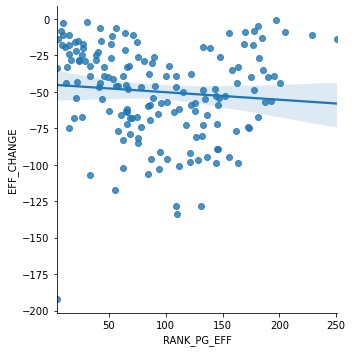

In [14]:
sns.lmplot(x='RANK_PG_EFF',y='EFF_CHANGE',data=regression_df)

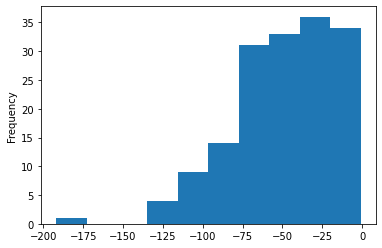

In [15]:
regression_df['EFF_CHANGE'].plot(kind='hist')

In [19]:
print(regression_df['EFF_CHANGE'].describe())

count    162.000000
mean     -49.882716
std       31.839541
min     -192.000000
25%      -68.000000
50%      -46.000000
75%      -26.000000
max       -1.000000
Name: EFF_CHANGE, dtype: float64


Looking at points in the season preceding the drop off

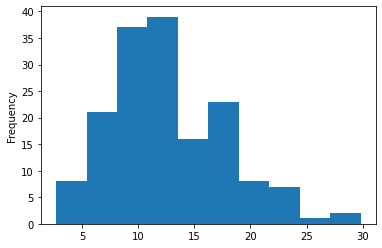

In [20]:
regression_df['PTS'].plot(kind='hist')

In [21]:
print(regression_df['PTS'].describe())

count    162.000000
mean      12.640123
std        5.141108
min        2.700000
25%        9.125000
50%       11.750000
75%       16.400000
max       29.800000
Name: PTS, dtype: float64


The box plots below show a similar pattern. Those who score the least and the most have less negative efficiency changes (drop off). Points is a key output stat that likely has high correlation with efficiency rank, so that makes sense.

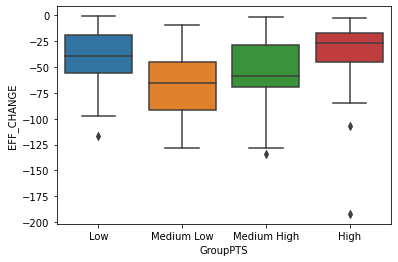

In [25]:
regression_df['GroupPTS'] = pd.qcut(regression_df['PTS'], 4, labels=['Low', 'Medium Low', 'Medium High', 'High'])

# Create a boxplot of 'PTS' vs 'Group'
sns.boxplot(x='GroupPTS', y='EFF_CHANGE', data=regression_df)

# Drop the 'Group' column
regression_df.drop(columns='GroupPTS', inplace=True)

Looking at minutes in the season preceding the drop

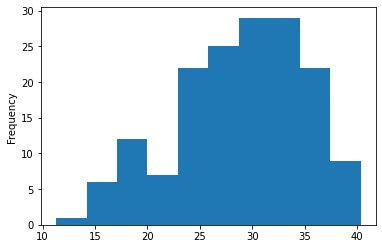

In [22]:
regression_df['MIN'].plot(kind='hist')

In [23]:
print(regression_df['MIN'].describe())

count    162.000000
mean      28.759259
std        6.082625
min       11.300000
25%       24.825000
50%       29.600000
75%       33.100000
max       40.300000
Name: MIN, dtype: float64


Likewise, highest and lowest minutes have least drop offs.

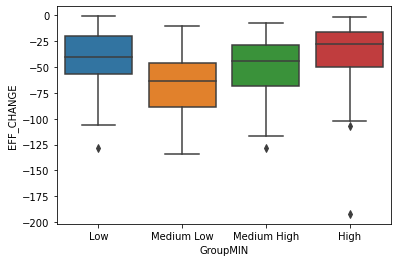

In [26]:
regression_df['GroupMIN'] = pd.qcut(regression_df['MIN'], 4, labels=['Low', 'Medium Low', 'Medium High', 'High'])

# Create a boxplot of 'PTS' vs 'Group'
sns.boxplot(x='GroupMIN', y='EFF_CHANGE', data=regression_df)

# Drop the 'Group' column
regression_df.drop(columns='GroupMIN', inplace=True)

#Looks like the shape is very similar to that of the points groups which would make sense --> minutes and points likely correlated

Now looking at age

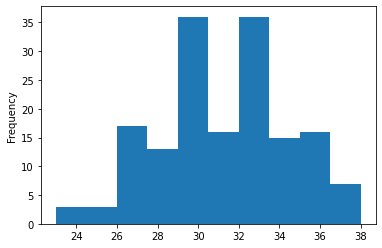

In [27]:
regression_df['PLAYER_AGE'].plot(kind='hist')

In [28]:
print(regression_df['PLAYER_AGE'].describe())

count    162.000000
mean      31.043210
std        3.155098
min       23.000000
25%       29.000000
50%       31.000000
75%       33.000000
max       38.000000
Name: PLAYER_AGE, dtype: float64


The following boxplots show that with exception to the final quartile (ages 33-38), as players get older their major drop off tends to be sharper. This could make sense as players whose most significant drop comes earlier likely declined more gradually as opposed to all at once. Remember, for this data set I only included players who had a season on record in which they were over 33 years old. As a result, some players may have had that very significant drop at younger ages but they wouldn't be included here if they did not stay in the league until age 33.

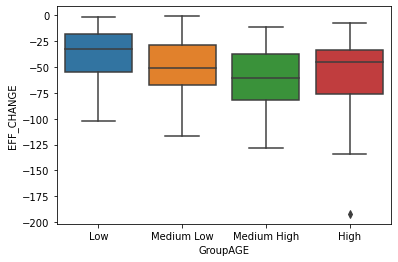

In [29]:
regression_df['GroupAGE'] = pd.qcut(regression_df['PLAYER_AGE'], 4, labels=['Low', 'Medium Low', 'Medium High', 'High'])

# Create a boxplot of 'PTS' vs 'Group'
sns.boxplot(x='GroupAGE', y='EFF_CHANGE', data=regression_df)

# Drop the 'Group' column
regression_df.drop(columns='GroupAGE', inplace=True)

The following plot is a simple correlation between age and actual rank. A higher number for rank means the player was worse (1st is the best player). Therefore, the trend line makes sense as the younger players are more likely to be in their prime.

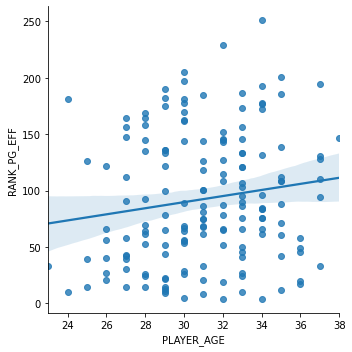

In [30]:
sns.lmplot(x='PLAYER_AGE',y='RANK_PG_EFF',data=regression_df)

**Looking at all the features and their correlation to efficiency change, the most highly correlated is player age which we explored. Games played is the next highest correlated, and this makes sense as it is highly related to player age. Interestingly, the rebounding stats at the bottom have the highest positive correlations to the drop off. As we know, big men are typically the ones getting more rebounds. Therefore, this could mean that big men see a less sharp drop (positive correlation means a smaller negative number). My guess is that as we have moved into a small ball era in the last decade, big men begin lower in ranks to begin with, meaning less room to drop**

In [36]:
regression_df.corr()['EFF_CHANGE'].sort_values()

#No surprise age is a big factor: older is likely to have higher drop off
#Interestingly, on the positive correlation, rebounding stats are the strongest

PLAYER_AGE       -0.291823
GP_career        -0.180892
FG3M_career      -0.129993
FG3A_career      -0.127771
FG3A             -0.111222
RANK_PG_EFF      -0.093349
FG3M             -0.090361
FG3_PCT_career   -0.071737
GS_career        -0.071075
PLAYER_ID        -0.069777
MIN_career       -0.055117
STL_career       -0.053095
FT_PCT_career    -0.050704
FG3_PCT          -0.035962
FTM_career       -0.035889
PTS_career       -0.029783
AST_career       -0.025911
FGA_career       -0.021086
TOV_career       -0.016937
FTA_career       -0.013969
AST              -0.007400
FGM_career       -0.001900
FT_PCT            0.006588
MIN               0.014014
BLK               0.035157
BLK_career        0.039971
TOV               0.050888
STL               0.057051
PTS               0.069789
FGA               0.069964
PF                0.070778
PF_career         0.077968
GP                0.079587
FGM               0.087833
FTM               0.092356
FG_PCT_career     0.092928
FG_PCT            0.093118
D

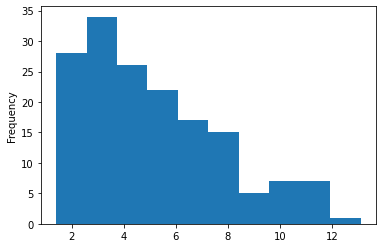

In [37]:
regression_df['REB'].plot(kind='hist')

In [38]:
print(regression_df['REB'].describe())

count    162.000000
mean       5.174074
std        2.679194
min        1.400000
25%        3.000000
50%        4.500000
75%        6.775000
max       13.100000
Name: REB, dtype: float64


Another look showing the highest rebounders drop the least

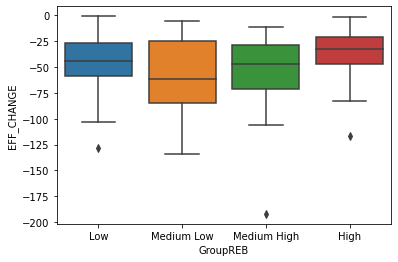

In [39]:
regression_df['GroupREB'] = pd.qcut(regression_df['REB'], 4, labels=['Low', 'Medium Low', 'Medium High', 'High'])

# Create a boxplot of 'PTS' vs 'Group'
sns.boxplot(x='GroupREB', y='EFF_CHANGE', data=regression_df)

# Drop the 'Group' column
regression_df.drop(columns='GroupREB', inplace=True)

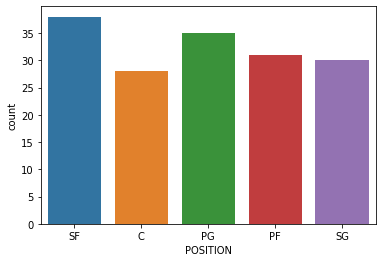

In [41]:
sns.countplot(x='POSITION', data = regression_df)

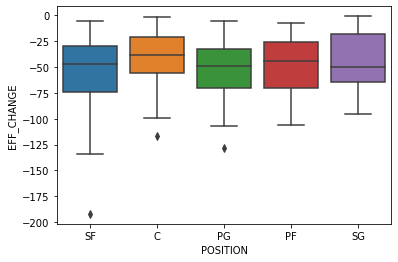

In [42]:
sns.boxplot(x='POSITION', y='EFF_CHANGE', data=regression_df)

**This look below contradicts my guess that big men start lower in the ranks. In fact, they begin as better players (looking at C and PF). My new hypothesis is that a lot of big men did not make the 33 year old threshold of my data set as the league has gone more small ball. Two charts above show that center is the position with the least data points in this data set. Therefore, the bigs that did make it were very above average players. This coupled with an earlier insight that better players drop off less, make sense.**

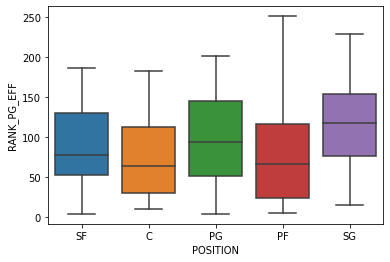

In [43]:
sns.boxplot(x='POSITION', y='RANK_PG_EFF', data=regression_df)
#looks like shooting guards are the worst players ahead of their cliff

In [52]:
regression_df['SEASON_ID'].unique()

array(['2007-08', '2005-06', '2009-10', '2011-12', '2000-01', '2008-09',
       '2006-07', '2002-03', '2013-14', '2014-15', '2004-05', '2012-13',
       '2015-16', '2003-04', '2016-17', '2020-21', '2017-18', '2010-11',
       '2018-19', '2019-20', '2021-22', '2022-23'], dtype=object)

Below is a look at the drop off by season preceding the drop off. The first few seasons below are the incorrect data points in the mistake I mentioned in part 2. Those are players that likely did not have a negative drop off and would not have made this data set if done correctly. As for the rest beginning about 2005, you can see that we have more data points as the years go on, which makes sense because these players had to have been active some time in the last 11 years. Additionally, 2022-23 is a faulty season because this year is not complete yet.

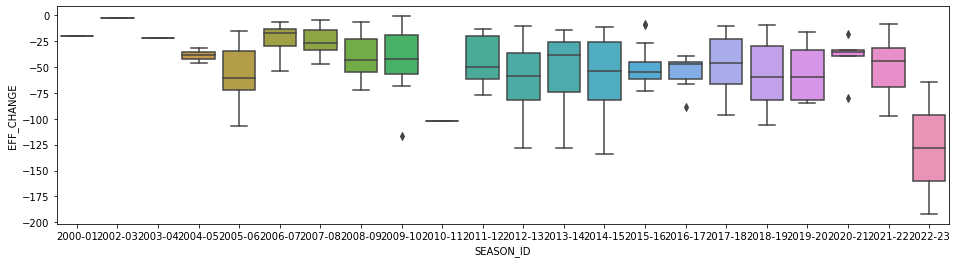

In [53]:
order = ['2000-01', '2002-03', '2003-04','2004-05', '2005-06', '2006-07', '2007-08', '2008-09','2009-10', '2010-11',
         '2011-12', '2012-13','2013-14', '2014-15','2015-16',  '2016-17',  '2017-18',
       '2018-19', '2019-20', '2020-21','2021-22', '2022-23']
plt.figure(figsize=(16,4))
sns.boxplot(x='SEASON_ID', y='EFF_CHANGE', data=regression_df, order=order)

#as we go further there are more players as part of the data pull

## Modeling

### Linear Regression

**The first model I will run is a linear model. I must first drop the individual season stats from this dataframe. The dataframe will only include career stats and position as it attempts to predict the age a player has their most significant drop off.**

In [55]:
final_regression = pd.get_dummies(regression_df,columns=['POSITION'],drop_first=True)
final_regression.columns

Index(['FULL_NAME', 'PLAYER_ID', 'SEASON_ID', 'RANK_PG_EFF', 'EFF_CHANGE',
       'TARGET', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GP_career',
       'GS_career', 'MIN_career', 'FGM_career', 'FGA_career', 'FG_PCT_career',
       'FG3M_career', 'FG3A_career', 'FG3_PCT_career', 'FTM_career',
       'FTA_career', 'FT_PCT_career', 'OREB_career', 'DREB_career',
       'REB_career', 'AST_career', 'STL_career', 'BLK_career', 'TOV_career',
       'PF_career', 'PTS_career', 'POSITION_PF', 'POSITION_PG', 'POSITION_SF',
       'POSITION_SG'],
      dtype='object')

In [124]:
reg_X = final_regression[['GP_career',
       'GS_career', 'MIN_career', 'FGM_career', 'FGA_career', 'FG_PCT_career',
       'FG3M_career', 'FG3A_career', 'FG3_PCT_career', 'FTM_career',
       'FTA_career', 'FT_PCT_career', 'OREB_career', 'DREB_career',
       'REB_career', 'AST_career', 'STL_career', 'BLK_career', 'TOV_career',
       'PF_career', 'PTS_career', 'POSITION_PF', 'POSITION_PG', 'POSITION_SF',
       'POSITION_SG']]
#Have to cut out single year data because we want to be able to predict for future players, not just old players
reg_y = final_regression['PLAYER_AGE']

In [57]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_y, test_size=0.2, random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression

In [185]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [186]:
predictions = lm.predict(X_test)

As you can see in this model, we achieved a R score of 0.197. This is not great correlation but it is pretty good for having so many features and for trying to predict something so ambiguous such as the age a player drops off. I will note that depending on the random state you select in the training and testing set split of the data you will get different results as the data set is not overly large (around 200 players).

In [187]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared: ', metrics.explained_variance_score(y_test, predictions))
print('R: ', np.sqrt(metrics.explained_variance_score(y_test, predictions)))

#very subject to the random state

MAE: 2.2102824646929515
MSE: 8.509290262182372
RMSE: 2.9170687791312657
R-squared:  0.03913806281542853
R:  0.1978334218867695


If this model were to be made into an equation, below would be the coefficients of each feature. As you can see, FGM and FG% have large coefficient values. FG3M and FG3% as well. This means the higher a scorer the were, the younger they drop off. This could make sense as role players who score less typically can see a more gradual decline. All the positions also have a negative coefficient with center being the baseline, which means their big drop off happens younger than centers, which supports the initial hypothesis that only very good big men made it to the data set and thus lasted longer.

In [188]:
coeff_df = pd.DataFrame(lm.coef_,reg_X.columns,columns=['Coefficient'])
coeff_df
#All positions have a negative coefficient, meaning the center position drops off less dramatically - similar to rebound numbers earlier
#Field goal percentage have the biggest sways

,Coefficient
GP_career,0.005068
GS_career,0.001762
MIN_career,-0.034641
FGM_career,-8.447811
FGA_career,-0.978891
FG_PCT_career,-4.916138
FG3M_career,-7.790767
FG3A_career,1.309401
FG3_PCT_career,3.436538
FTM_career,-5.216738


In [189]:
import statsmodels.api as sm
results = sm.OLS(y_train,X_train).fit()
p_value = results.pvalues[reg_X.columns]

Now we run p-values to see which features are significant, meaning we trust the coefficients (the effects) previously. As we can see, FG%, GP, and FT% are all statistically significant as well as some of the positional categories. As you can see, the PF position has low significance in terms of its difference to the center position, meaning our assumption of lumping them together in our big men hypotheses make sense.

In [190]:
p_value.sort_values()
#FG%, rank, position, GP are all notable; PF is similar to C
#Even in other random states where r-squared is lower, similar features have near statistical significance

FG_PCT_career     0.012568
GP_career         0.014632
FT_PCT_career     0.016506
POSITION_PG       0.116527
FTM_career        0.153100
POSITION_SF       0.167337
BLK_career        0.205065
FGM_career        0.209676
FG3M_career       0.227980
FTA_career        0.285764
PTS_career        0.305295
STL_career        0.376924
POSITION_SG       0.397015
FG3_PCT_career    0.460607
FG3A_career       0.484800
GS_career         0.542470
FGA_career        0.554468
AST_career        0.630759
POSITION_PF       0.800117
MIN_career        0.800387
DREB_career       0.841665
PF_career         0.896518
OREB_career       0.904118
REB_career        0.918293
TOV_career        0.948444
dtype: float64

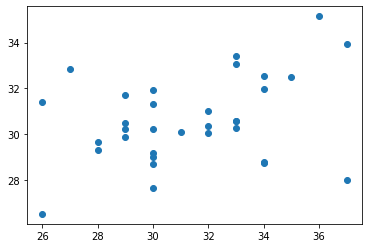

In [191]:
plt.scatter(y_test,predictions)

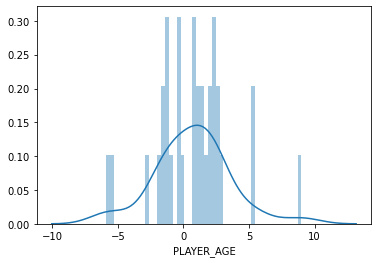

In [192]:
sns.distplot((y_test-predictions),bins=50)

### Logistic Regression

**We now run a logistic regression on our classification dataframe. That dataframe includes individual seasons as separate rows, player rank, and age, while attempting to predict the target: whether a player has their biggest drop off in the following season.**

In [84]:
final_classification = pd.get_dummies(classification_df,columns=['POSITION'],drop_first=True)
final_classification.columns

Index(['FULL_NAME', 'PLAYER_ID', 'SEASON_ID', 'RANK_PG_EFF', 'EFF_CHANGE',
       'TARGET', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSITION_PF',
       'POSITION_PG', 'POSITION_SF', 'POSITION_SG'],
      dtype='object')

In [85]:
clas_X = final_classification[['RANK_PG_EFF','PLAYER_AGE', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'POSITION_PF',
       'POSITION_PG', 'POSITION_SF', 'POSITION_SG']]

clas_y = final_classification['TARGET']

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(clas_X, clas_y, test_size=0.2, random_state=101)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [105]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

LogisticRegression()

In [106]:
predictions2 = logmodel.predict(X_test2)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test2 ,predictions2))
print('\n')
confusion_matrix(y_test2, predictions2)

#as expected, it essentially picks everything as false

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       225
        True       0.23      0.10      0.14        31

    accuracy                           0.85       256
   macro avg       0.56      0.53      0.53       256
weighted avg       0.81      0.85      0.82       256





array([[215,  10],
       [ 28,   3]], dtype=int64)

As you can see, this model essentially picks False for nearly every row. As a result the logistic regression has little relevance. It selected 13 trues when there were about 31 and only 3 were correct.

### Random Forest Model

**We will also try a random forest with the same goal in mind as the logistic regression: using season stats, rank, and age, to predict if a player is in the year prior to their largest drop off.**

In [109]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=600)

In [110]:
predictions3 = rfc.predict(X_test2)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test2 ,predictions3))
print('\n')
confusion_matrix(y_test2, predictions3)

#same deal here

              precision    recall  f1-score   support

       False       0.88      1.00      0.94       225
        True       1.00      0.03      0.06        31

    accuracy                           0.88       256
   macro avg       0.94      0.52      0.50       256
weighted avg       0.90      0.88      0.83       256





array([[225,   0],
       [ 30,   1]], dtype=int64)

We see the same result with our random forest. Of 31 Trues in our test set, it only selected one.

### Keras Deep Learning

**Lastly, we will try a deep learning model to try the same thing we did with the linear regression. We want to predict the age a player has their largest drop off given their career averages and their position.

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
X_train3 = scaler2.fit_transform(X_train)
X_test3 = scaler2.transform(X_test)

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [153]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(46,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam')

In [154]:
model.fit(x=X_train3,y=y_train.values,
          validation_data=(X_test3,y_test.values), epochs=400)

Epoch 1/400
5/5 [==============================] - 1s 39ms/step - loss: 953.8694 - val_loss: 973.2635
Epoch 2/400
5/5 [==============================] - 0s 11ms/step - loss: 944.5837 - val_loss: 964.1570
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 935.6722 - val_loss: 953.2513
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 922.1244 - val_loss: 939.2701
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 900.8516 - val_loss: 920.7264
Epoch 6/400
5/5 [==============================] - 0s 11ms/step - loss: 886.7129 - val_loss: 898.0820
Epoch 7/400
5/5 [==============================] - 0s 13ms/step - loss: 852.2617 - val_loss: 869.9349
Epoch 8/400
5/5 [==============================] - 0s 13ms/step - loss: 820.1165 - val_loss: 834.9853
Epoch 9/400
5/5 [==============================] - 0s 13ms/step - loss: 784.6518 - val_loss: 793.7527
Epoch 10/400
5/5 [==============================] - 0s 12ms/step - loss: 743.1076 

In [155]:
losses = pd.DataFrame(model.history.history)

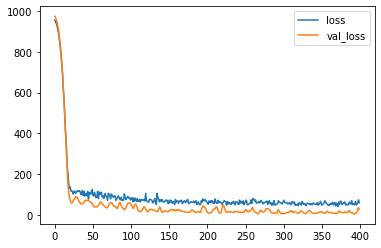

In [156]:
losses.plot()

In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [157]:
predictions4 = model.predict(X_test3)

2/2 [==============================] - 0s 3ms/step


In [158]:
mean_absolute_error(y_test,predictions4)

4.997402017766779

In [159]:
explained_variance_score(y_test,predictions4)

0.46077660376416096

In [175]:
reg_X

,GP_career,GS_career,MIN_career,FGM_career,FGA_career,FG_PCT_career,FG3M_career,FG3A_career,FG3_PCT_career,FTM_career,FTA_career,FT_PCT_career,OREB_career,DREB_career,REB_career,AST_career,STL_career,BLK_career,TOV_career,PF_career,PTS_career,POSITION_PF,POSITION_PG,POSITION_SF,POSITION_SG
0,1026,972,33.9,6.2,12.8,0.483,0.2,0.7,0.314,4.1,5.4,0.769,1.1,4.9,6.0,4.1,1.2,0.6,2.4,2.3,16.7,0,0,1,0
1,1208,900,30.3,5.4,11.5,0.469,0.0,0.0,0.120,2.5,3.3,0.764,1.9,4.2,6.1,2.2,0.7,0.3,2.0,2.9,13.4,0,0,0,0
2,1391,1350,36.0,4.5,11.2,0.400,1.4,4.1,0.349,2.2,2.8,0.785,1.3,5.0,6.3,8.7,1.9,0.3,2.9,1.8,12.6,0,1,0,0
3,1110,650,24.5,3.5,7.1,0.486,0.0,0.0,0.281,1.2,1.5,0.760,1.7,4.9,6.6,1.1,0.7,0.8,1.1,3.2,8.1,0,0,0,0
4,1462,1425,34.5,7.2,14.5,0.497,0.1,0.4,0.275,3.3,4.2,0.789,2.2,7.8,10.0,3.7,1.3,1.4,2.2,2.4,17.8,1,0,0,0
5,970,564,31.2,5.6,13.6,0.409,1.0,3.3,0.309,4.8,5.8,0.822,1.0,2.2,3.2,3.3,0.9,0.5,2.7,1.9,16.9,0,0,1,0
6,1109,956,32.7,5.7,12.2,0.467,1.0,2.9,0.336,2.1,2.9,0.721,1.4,5.3,6.7,1.8,1.0,1.3,1.5,2.9,14.4,0,0,0,0
8,1300,1149,35.7,6.6,14.6,0.452,2.3,5.7,0.400,3.4,3.8,0.894,0.9,3.1,4.1,3.4,1.1,0.2,2.1,2.2,18.9,0,0,0,1
9,1217,1053,31.3,5.2,10.6,0.490,1.4,3.2,0.428,2.5,2.8,0.904,0.5,2.5,3.0,8.5,0.7,0.1,2.9,1.6,14.3,0,1,0,0
10,1287,731,25.4,2.9,7.2,0.399,1.0,2.6,0.374,1.6,1.9,0.817,0.3,1.7,2.1,3.0,1.1,0.1,1.1,2.1,8.3,0,1,0,0


In [179]:
X_test3.shape

(33, 25)

In [180]:
X_train3.shape

(129, 25)

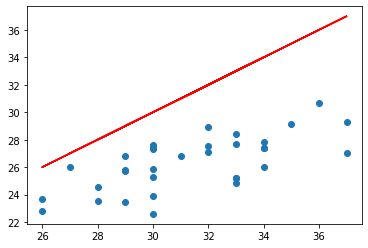

In [183]:
# Our predictions
plt.scatter(y_test,predictions4)

# Perfect predictions
plt.plot(y_test,y_test,'r')

#Seems like the model underestimates the decline age

As you can see from the chart above, the deep learning model essentially underestimates the age a player has his biggest decline in all instances, making this model pretty useless as well. Admittedly, this is the model I understand the least so I'm sure there are ways to improve this model by altering the number of nodes and neurons in the deep learning model. It is also possible the mistake I made in part 2 played a part in this, although I don't believe that is why EVERY point was underestimated.

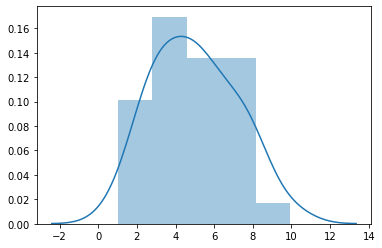

In [193]:
errors = y_test.values.reshape(33, 1) - predictions4
sns.distplot(errors)